# Import Library

In [1]:
'''Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

# from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

Using Theano backend.


# Load Data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Change Data Type

In [3]:
data = train.as_matrix()
X_test = test.as_matrix()
X = data[:,1:]
Y = data[:,0]
print(list(map(np.shape, [X, Y, X_test])))

[(42000, 784), (42000,), (28000, 784)]


# Reshape

In [4]:
# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    X = X.reshape(X.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X = X.reshape(X.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
print(list(map(np.shape, [X, Y, X_test])))

[(42000, 28, 28, 1), (42000,), (28000, 28, 28, 1)]


# Split Data

In [5]:
x_train, x_val, y_train, y_val = train_test_split(X,
                                                  Y,
                                                  train_size=0.95,
                                                  test_size=0.05,
                                                  random_state=37)
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255
x_val /= 255
print('x_train shape:', x_train.shape)
print('x_val shape:', x_val.shape)
print(x_train.shape[0], 'train samples')
print(x_val.shape[0], 'test samples')

x_train shape: (39900, 28, 28, 1)
x_val shape: (2100, 28, 28, 1)
39900 train samples
2100 test samples


In [6]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

# Define Plot Function

In [7]:
def plotLearningCurve(history):
    history_dict = history.history
    #history_dict.keys()
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values) + 1)
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    # plot loss
    plt.plot(epochs, loss_values, 'bo', label="loss")
    plt.plot(epochs, val_loss_values, 'b+', label="val loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    #plot accuracy
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc_values, 'bo', label="acc")
    plt.plot(epochs, val_acc_values, 'b+', label="val acc")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()

# Define Model

In [9]:
batch_size = 128
epochs = 15

model = Sequential()
# 1
model.add(Conv2D(filters=32, kernel_size=5, padding='Same',
                 activation='relu', input_shape=input_shape))
model.add(Conv2D(filters=20, kernel_size=5, padding='Same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=3, padding='Same',
                 activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='Same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [10]:
history1 = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(x_val, y_val))
score = model.evaluate(x_val, y_val, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
#model.predict(x_test)

Validation loss: 0.00187765007529
Validation accuracy: 0.989047619048


# Plot

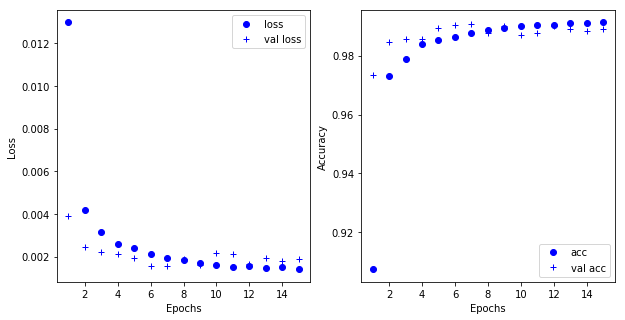

In [11]:
plotLearningCurve(history1)

# Predict

In [12]:
prediction = model.predict_classes(X_test)
submissions = pd.DataFrame({"ImageId":list(range(1,len(prediction)+1)),
                           "Label":prediction})
submissions.to_csv("CNN.csv", index=False, header=True)

28000/28000 [==============================] - 70s 2ms/step
